<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/robot_test_arrows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Средний поворот: -1.00 градусов
Среднее изменение расстояния: 20.00 см
Поворотов налево: 1, направо: 2
Движений вперед: 2, назад: 3
Движение вперед на 20.00 см. Поворот направо на -1.00 градусов.


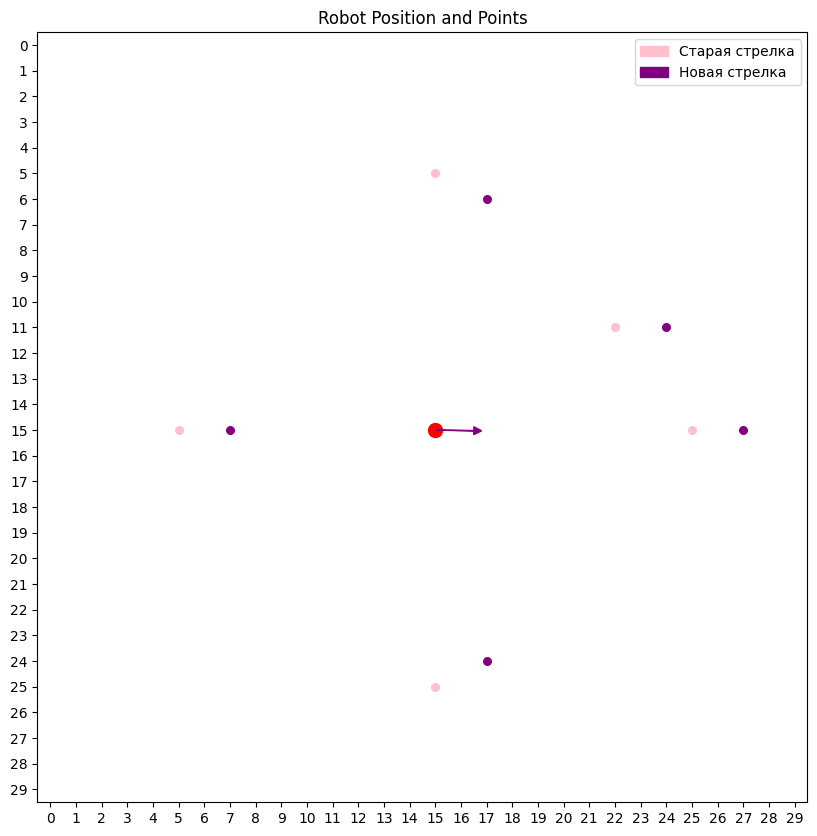

In [188]:
import numpy as np
import math
import matplotlib.pyplot as plt

# поворот налево
# scans = np.array([[[0, 1000], [90, 1000], [180, 1000], [270, 1000], [30, 800]], [[30, 1000], [120, 1000], [210, 1000], [300, 1000], [60, 800]]])

# поворот направо
# scans = np.array([[[0, 1000], [90, 1000], [180, 1000], [270, 1000], [30, 800]], [[330, 1000], [60, 1000], [150, 1000], [240, 1000], [0, 800]]])

# движение вперед
# scans = np.array([[[0, 1000], [90, 1000], [180, 1000], [270, 1000], [30, 800]], [[0, 800], [100, 1050], [180, 1200], [260, 1050], [35, 600]]])

# движение назад
scans = np.array([[[0, 1000], [90, 1000], [180, 1000], [270, 1000], [30, 800]], [[0, 1200], [80, 950], [180, 800], [280, 950], [25, 1000]]])

scale = 100
array_size = 30
robot_position = (array_size // 2, array_size // 2)
initial_angle = 0

def calculate_points(scans, robot_position, scale, array_size):
    points = []
    for scan in scans:
        angle_radians = math.radians(scan[0])
        distance_cells = scan[1] / scale
        dx = distance_cells * math.cos(angle_radians)
        dy = distance_cells * math.sin(angle_radians)
        point_x = int(round(robot_position[0] + dx))
        point_y = int(round(robot_position[1] - dy))
        if 0 <= point_x < array_size and 0 <= point_y < array_size:
            points.append((point_x, point_y))
    return points


points = calculate_points(scans[0], robot_position, scale, array_size)
new_points = calculate_points(scans[1], robot_position, scale, array_size)


def analyze_movement_and_turns(scan1, scan2):
    total_angle_diff = 0
    total_distance_diff = 0
    count = len(scan1)
    turns_right = 0
    turns_left = 0
    moves_forward = 0
    moves_backward = 0
    for data1, data2 in zip(scan1, scan2):
        angle1 = data1[0]
        angle2 = data2[0]
        angle_diff = angle2 - angle1
        if angle_diff > 180:
            angle_diff -= 360
        elif angle_diff < -180:
            angle_diff += 360
        distance1 = data1[1]
        distance2 = data2[1]
        distance_diff = distance2 - distance1
        total_angle_diff += angle_diff
        total_distance_diff += distance_diff
        if angle_diff > 0:
            turns_left += 1
        elif angle_diff < 0:
            turns_right += 1
        if distance_diff > 0:
            moves_forward += 1
        elif distance_diff < 0:
            moves_backward += 1
    average_angle_diff = total_angle_diff / count
    average_distance_diff = total_distance_diff / count
    return average_angle_diff, average_distance_diff, turns_right, turns_left, moves_forward, moves_backward

average_angle_diff, average_distance_diff, turns_right, turns_left, moves_forward, moves_backward = analyze_movement_and_turns(scans[0], scans[1])

print(f"Средний поворот: {average_angle_diff:.2f} градусов")
print(f"Среднее изменение расстояния: {average_distance_diff:.2f} см")
print(f"Поворотов налево: {turns_left}, направо: {turns_right}")
print(f"Движений вперед: {moves_forward}, назад: {moves_backward}")


def summarize_movement_and_turns(average_distance_diff, average_angle_diff):
    movement = ""
    if average_distance_diff > 0:
        movement += f"Движение вперед на {average_distance_diff:.2f} см. "
    elif average_distance_diff < 0:
        movement += f"Движение назад на {average_distance_diff:.2f} см. "
    else:
        movement += "Нет движения. "
    if average_angle_diff > 0:
        movement += f"Поворот налево на {average_angle_diff:.2f} градусов."
    elif average_angle_diff < 0:
        movement += f"Поворот направо на {average_angle_diff:.2f} градусов."
    else:
        movement += "Нет поворота."
    return movement

print(summarize_movement_and_turns(average_distance_diff, average_angle_diff))

def draw_arrow(position, angle, color, label):
    arrow_length = 1.5
    angle_radians = math.radians(angle)
    dx = arrow_length * math.cos(angle_radians)
    dy = arrow_length * math.sin(angle_radians)
    plt.arrow(position[0], position[1], dx, -dy, head_width=0.3, head_length=0.3, fc=color, ec=color, label=label)

plt.figure(figsize=(10, 10))
plt.scatter(*robot_position[::-1], color='red', s=100)

if points:
    x_indices_old, y_indices_old = zip(*points)
    plt.scatter(x_indices_old, y_indices_old, color='pink', s=30)

if new_points:
    x_indices_new, y_indices_new = zip(*new_points)
    plt.scatter(x_indices_new, y_indices_new, color='purple', s=30)

draw_arrow(robot_position[::-1], initial_angle, 'pink', 'Старая стрелка')
new_angle = initial_angle + average_angle_diff
draw_arrow(robot_position[::-1], new_angle, 'purple', 'Новая стрелка')

plt.xlim(-0.5, array_size - 0.5)
plt.ylim(array_size - 0.5, -0.5)
plt.xticks(range(array_size))
plt.yticks(range(array_size))
plt.grid(False)
plt.gcf().patch.set_facecolor('white')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Robot Position and Points')
plt.legend()
plt.show()